# Superstore Analysis and Prediction: Sales Data Insights with Data Science
____

In this notebook, I aim to demonstrate how Data Science, as well as Python, can serve as powerful tools to extract critical insights from SuperStore's sales data. This analysis will uncover actionable trends and support strategic decisions. I will explore drivers of sales and profitability, develop predictive models, and deliver data-driven recommendations to enhance revenue and profitability. This notebook will showcase how data science techniques can transform retail analytics and provide a valuable resource for utilizing such methods effectively in financial and business decisions.

**Objective**:  
The goal of this project is to analyze sales data and build a machine learning model to predict **profit margins** for different products based on various features such as sales quantity, discounts, and costs.

**Problem Statement:**

This project is an in-depth analysis of SuperStore’s transaction data aimed at uncovering insights to support strategic business decisions. By exploring this dataset, I seek to understand the key drivers of sales and profitability, with a focus on customer segments, product categories, discounting practices, and regional performance.

The objectives of this analysis are:

1. Identify Financial Drivers: Conduct an in-depth examination of factors such as customer demographics, discount levels, and regional sales to determine which variables most significantly impact revenue and profitability. This will highlight high-value areas that SuperStore may prioritize to enhance overall financial performance.

2. Develop Predictive Models: Utilize linear regression to forecast sales and profit margins and logistic regression to classify orders as profitable or non-profitable. These models will aid in projecting future performance and guiding inventory, pricing, and marketing decisions.

3. Provide Actionable Recommendations: Based on the insights gained from financial analysis and predictive modeling, this project will offer data-driven strategies to optimize SuperStore’s revenue growth and profitability. Recommendations will cover discount policies, customer targeting, and inventory management.

This project serves as both a personal development initiative to refine my data science and financial analysis skills and a practical exploration of how data-driven insights can address real-world business challenges in the retail sector.

#### Table of Contents

- [Introduction](#introduction)
- [Essential Libraries](#essential-libraries)
  - [Pandas](#pandas)
  - [Matplotlib & Seaborn](#matplotlib-seaborn)
  - [Scikit-Learn](#scikit-learn)
- [1 | Getting Started](#getting-started)
  - [Data Overview](#data-overview)
  - [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
  - [Exploratory Data Analysis](#exploratory-data-analysis)
- [2 | Predictive Modeling](#predictive-modeling)
  - [Linear Regression for Sales Prediction](#linear-regression-for-sales-prediction)
  - [Logistic Regression for Profit Classification](#logistic-regression-for-profit-classification)
- [3 | Key Insights](#key-insights)
  - [High-Value Customers](#high-value-customers)
  - [Profit Margin Trends](#profit-margin-trends)
  - [Regional Performance](#regional-performance)
- [4 | Recommendations](#recommendations)
  - [Optimizing Discount Strategies](#optimizing-discount-strategies)
  - [Customer Segmentation for Targeted Marketing](#customer-segmentation-for-targeted-marketing)
  - [Efficient Inventory Planning](#efficient-inventory-planning)
- [Conclusion](#conclusion)



## Introduction
_____


Retail businesses like SuperStore rely on data-driven insights to optimize sales, profitability, and customer satisfaction. The ability to analyze transaction data, identify trends, and predict future performance is crucial for strategic decision-making. This project aims to leverage data science techniques to extract actionable insights from SuperStore's sales data and develop predictive models to forecast sales revenue and profit margins.

**Dataset Overview**

The dataset includes records of sales transactions with the following key features:

**Most Relevant Features**

1. **Order Date (`order_date`)**  
   Useful for capturing seasonality and sales trends.
   
2. **Ship Date (`ship_date`)**  
   Provides insights into logistics efficiency and its effect on customer satisfaction and repeat sales.

3. **Product Name (`product_name`)**  
   Highlights specific products that drive sales or profitability.

4. **Segment (`segment`)**  
   Differentiates sales across segments like Corporate, Consumer, and Home Office.

5. **Category (`category`)** and **Subcategory (`subcategory`)**  
   Groups products into broader classifications to reveal sales patterns.

6. **Region (`region`)**, **City (`city`)**, **State (`state`)**, **Country (`country`)**  
   Indicates geographical variations in demand and consumer behavior.

7. **Discount (`discount`)**  
   A significant factor influencing sales volumes and profitability.

8. **Quantity (`quantity`)**  
   The quantity sold is directly proportional to sales revenue.

9.**Customer Name (`customer_name`)**  
   This is useful for customer segmentation, critical for predicting sales at the order level.

9. **Profit (`profit`)**  
   Provides an understanding of the relationship between sales and profitability.

3. **Manufacturer (`manufacturer`)**  
   Relevant for predicting sales revenue directly.

6. **Profit Margin (`profit_margin`)**  
   A derived metric; the ratio of profit to sales revenue.

**Less Relevant Features**
1. **Order ID (`order_id`)**  
   Unique identifier for each order; not predictive of sales.

4. **Zip Code (`zip`)**  
   Too granular for this analysis; broader geographical features are more useful.

5. **Country (`country`)**  
   Since all data is from the United States, this feature adds no variability.


**Key Features of the Project**

- **Sales Prediction**: Develop predictive models to forecast sales revenue.
- **Profitability Analysis**: Understand factors contributing to profitable transactions using logistic regression.
- **Actionable Insights**: Identify trends and drivers of sales to guide strategic decisions in retail operations.
- **Recommendations**: Deliver data-driven strategies for optimizing discounts, targeting customers, and managing inventory effectively.

This project illustrates the transformative power of data science in retail analytics, making it an invaluable resource for financial and business decision-making.



## Essential Libraries
_____

The following libraries are essential for data analysis, visualization, and machine learning tasks in Python. We will use these libraries to explore the SuperStore sales data, develop predictive models, and derive actionable insights.

In [135]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import skimpy as sp
import dtale as dt

# visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



## Getting Started
_____

### Data Overview

In [136]:
# file path of the CSV file
file_path = 'superstore_dataset.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Preview the loaded data
df.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

### Data Cleaning and Preprocessing


In [138]:
df.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [139]:
# check the shape of the dataset
df.shape

(9994, 19)

In [140]:
# drop the columns that are not needed
df = df.drop(['zip', 'country'], axis=1)

In [141]:
# check for missing values
df.isnull().sum()

order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
city             0
state            0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64

In [142]:
# check the unique values in the dataset
df.nunique()

order_id         5009
order_date       1236
ship_date        1334
customer          793
manufactory       182
product_name     1849
segment             3
category            3
subcategory        17
region              4
city              531
state              49
discount           12
profit           7287
quantity           14
sales            5825
profit_margin     288
dtype: int64

In [143]:
# decompose the 'Order Date' column into year, month, and day
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

In [144]:
# decompose the 'Ship Date' column into year, month, and day
df['ship_date'] = pd.to_datetime(df['ship_date'])   
df['ship_year'] = df['ship_date'].dt.year
df['ship_month'] = df['ship_date'].dt.month

In [145]:

# collection of object columns
object_columns_content = df.select_dtypes(include='object')

# transforming those columns to uniform content 
def clean_column_content(df, column_name):
    df[column_name] = df[column_name].astype(str)
    df[column_name] = df[column_name].str.lower()
    df[column_name] = df[column_name].str.replace(' ', '_')
    return df

for col in object_columns_content:
    clean_categorical_data = clean_column_content(df, col)
    
df = clean_categorical_data

In [146]:
df.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,...,state,discount,profit,quantity,sales,profit_margin,order_year,order_month,ship_year,ship_month
0,us-2020-103800,2019-01-03,2019-01-07,darren_powers,message_book,"message_book,_wirebound,_four_5_1/2""_x_4""_form...",consumer,office_supplies,paper,central,...,texas,0.2,5.5512,2,16.448,0.3375,2019,1,2019,1
1,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,gbc,gbc_standard_plastic_binding_systems_combs,home_office,office_supplies,binders,central,...,illinois,0.8,-5.4870,2,3.540,-1.5500,2019,1,2019,1
2,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,avery,avery_508,home_office,office_supplies,labels,central,...,illinois,0.2,4.2717,3,11.784,0.3625,2019,1,2019,1
3,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,safco,safco_boltless_steel_shelving,home_office,office_supplies,storage,central,...,illinois,0.2,-64.7748,3,272.736,-0.2375,2019,1,2019,1
4,us-2020-141817,2019-01-05,2019-01-12,mick_brown,avery,avery_hi-liter_everbold_pen_style_fluorescent_...,consumer,office_supplies,art,east,...,pennsylvania,0.2,4.8840,3,19.536,0.2500,2019,1,2019,1


In [147]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the product_name column
df['product_name_encoded'] = le.fit_transform(df['product_name'])

In [148]:
df.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,...,discount,profit,quantity,sales,profit_margin,order_year,order_month,ship_year,ship_month,product_name_encoded
0,us-2020-103800,2019-01-03,2019-01-07,darren_powers,message_book,"message_book,_wirebound,_four_5_1/2""_x_4""_form...",consumer,office_supplies,paper,central,...,0.2,5.5512,2,16.448,0.3375,2019,1,2019,1,1086
1,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,gbc,gbc_standard_plastic_binding_systems_combs,home_office,office_supplies,binders,central,...,0.8,-5.4870,2,3.540,-1.5500,2019,1,2019,1,708
2,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,avery,avery_508,home_office,office_supplies,labels,central,...,0.2,4.2717,3,11.784,0.3625,2019,1,2019,1,217
3,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,safco,safco_boltless_steel_shelving,home_office,office_supplies,storage,central,...,0.2,-64.7748,3,272.736,-0.2375,2019,1,2019,1,1371
4,us-2020-141817,2019-01-05,2019-01-12,mick_brown,avery,avery_hi-liter_everbold_pen_style_fluorescent_...,consumer,office_supplies,art,east,...,0.2,4.8840,3,19.536,0.2500,2019,1,2019,1,250


In [149]:
# droping the product_name after encoding 
df = df.drop('product_name', axis=1)

In [150]:
# Setting the profit taget variable to categorical either profitable or not
df['profit'] = np.where(df['profit'] > 0, 'yes', 'no')

In [151]:
# checking the target variables 
df['profit'].value_counts(normalize=True)

profit
yes    0.806284
no     0.193716
Name: proportion, dtype: float64

In [152]:
# converting the target column to binary
df.profit = (df.profit == 'yes').astype(int)

In [153]:
df.profit.head()

0    1
1    0
2    1
3    0
4    1
Name: profit, dtype: int64

In [154]:
df.head()

,order_id,order_date,ship_date,customer,manufactory,segment,category,subcategory,region,city,...,discount,profit,quantity,sales,profit_margin,order_year,order_month,ship_year,ship_month,product_name_encoded
0,us-2020-103800,2019-01-03,2019-01-07,darren_powers,message_book,consumer,office_supplies,paper,central,houston,...,0.2,1,2,16.448,0.3375,2019,1,2019,1,1086
1,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,gbc,home_office,office_supplies,binders,central,naperville,...,0.8,0,2,3.540,-1.5500,2019,1,2019,1,708
2,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,avery,home_office,office_supplies,labels,central,naperville,...,0.2,1,3,11.784,0.3625,2019,1,2019,1,217
3,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,safco,home_office,office_supplies,storage,central,naperville,...,0.2,0,3,272.736,-0.2375,2019,1,2019,1,1371
4,us-2020-141817,2019-01-05,2019-01-12,mick_brown,avery,consumer,office_supplies,art,east,philadelphia,...,0.2,1,3,19.536,0.2500,2019,1,2019,1,250


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              9994 non-null   object        
 1   order_date            9994 non-null   datetime64[ns]
 2   ship_date             9994 non-null   datetime64[ns]
 3   customer              9994 non-null   object        
 4   manufactory           9994 non-null   object        
 5   segment               9994 non-null   object        
 6   category              9994 non-null   object        
 7   subcategory           9994 non-null   object        
 8   region                9994 non-null   object        
 9   city                  9994 non-null   object        
 10  state                 9994 non-null   object        
 11  discount              9994 non-null   float64       
 12  profit                9994 non-null   int64         
 13  quantity          

**Identify categorical and numerical columns**

In [156]:
numerical_columns = [
            'quantity',
            'sales',
            'profit_margin',
            'order_year',
            'order_month',
            'ship_year',
            'ship_month']



categorical_columns = [
            'order_id',
            'customer',
            'manufactory',
            'product_name_encoded',
            'segment',
            'category',
            'subcategory',
            'region',
            'city',
            'state']

**Understanding Data Distributions**

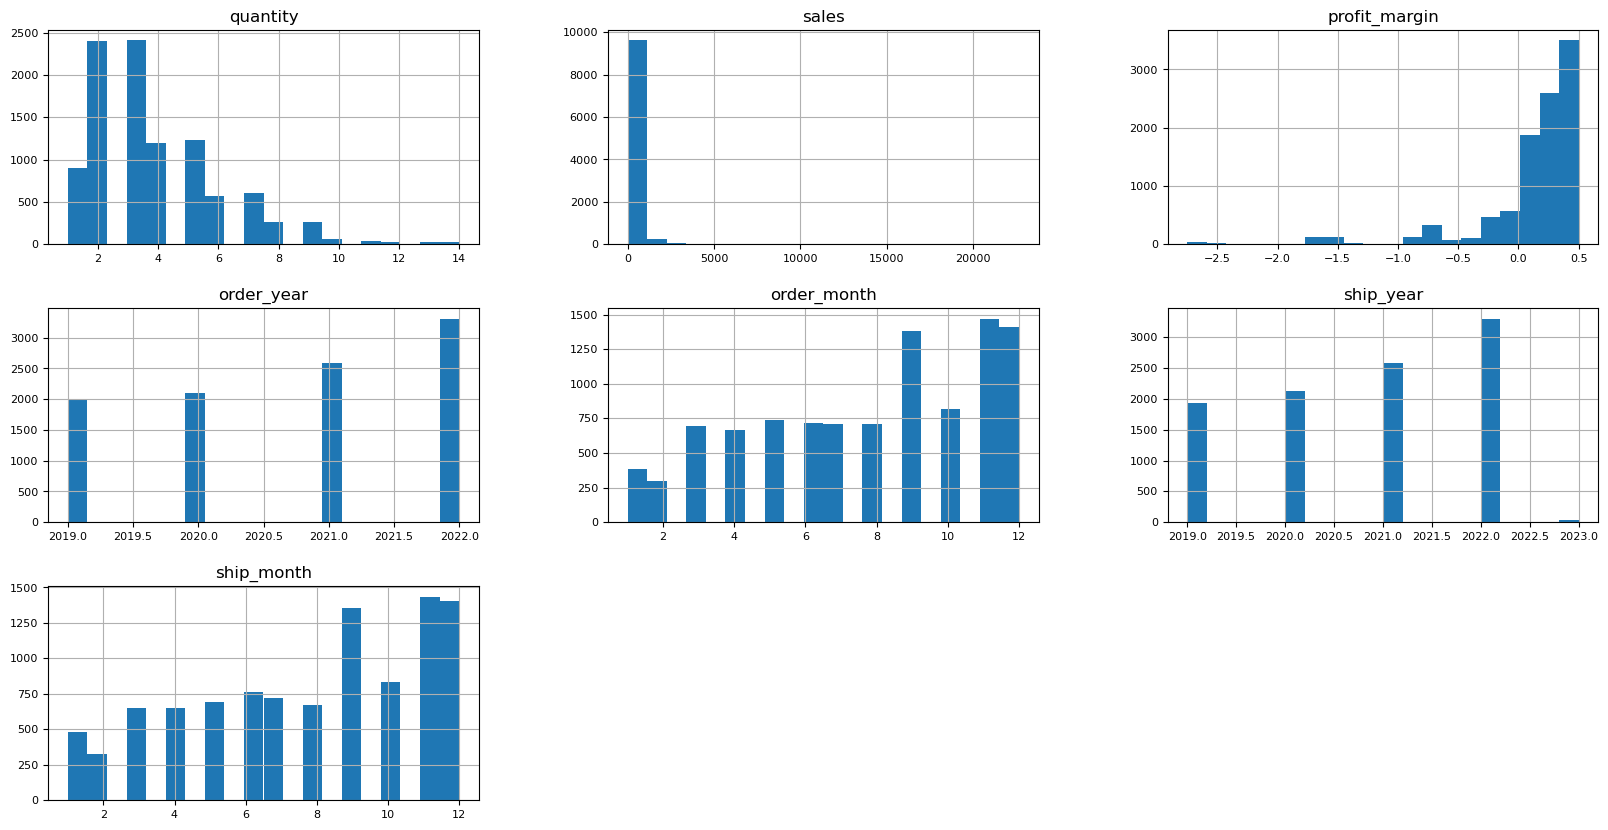

In [157]:
# understanding the distribution of the numerical columns
df[numerical_columns].hist(figsize=(20, 10), bins=20, xlabelsize=8, ylabelsize=8)
plt.show()

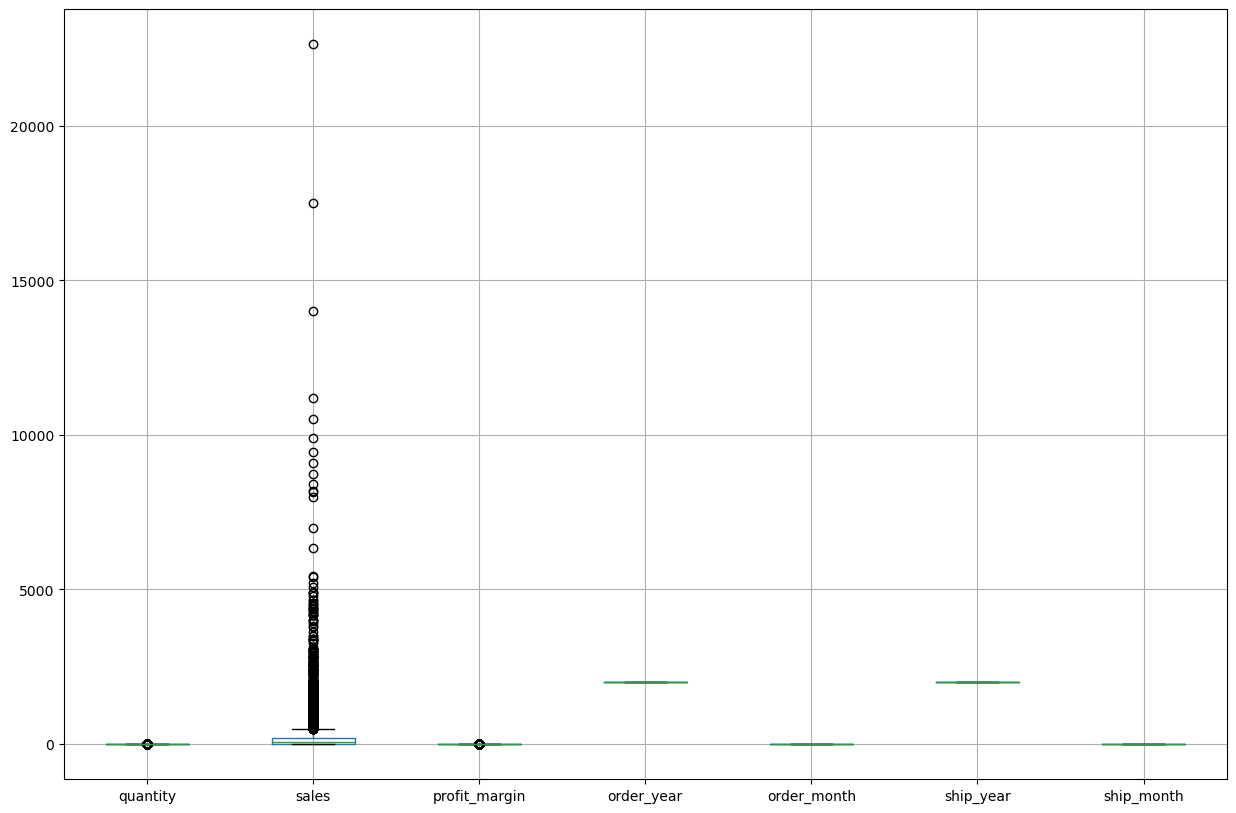

In [158]:
# using Box Plots to understand the distribution of the numerical columns
df[numerical_columns].boxplot(figsize=(15,10))
plt.show()

From the visualisation above, it is obvious that the sales column contain outlier, thus, log transformation will apply to the sales columnn to normalised it 

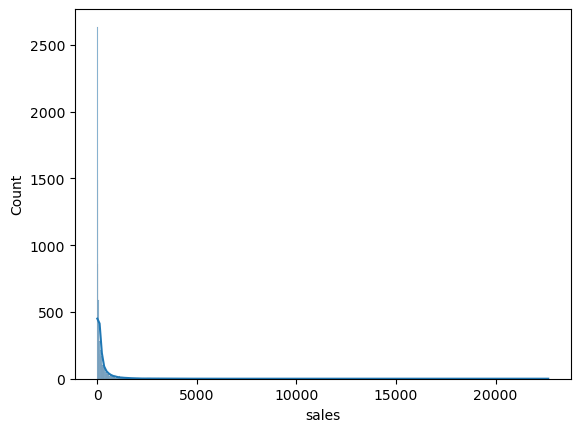

In [159]:
# view the sales target variable before normalisation 
sns.histplot(df['sales'], kde=True)
plt.show()

In [160]:
# using the log scale to plot the histogram
df['sales'] = np.log1p(df.sales)

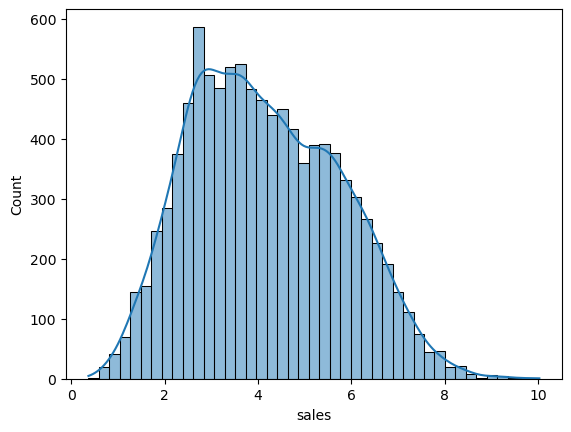

In [161]:
# view after transformation 
sns.histplot(df['sales'], kde=True)
plt.show()

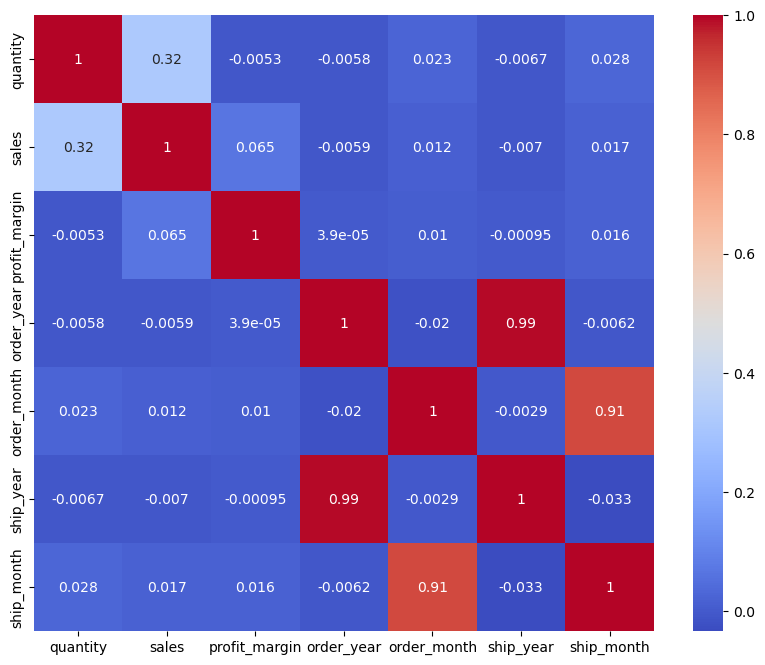

In [162]:
# viewing the relationship between the numeric features
correlation = df[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

## Setting Up Validation Framework
___

**Splitting the data into training and testing sets**

In [163]:
# splitting the data into training and testing
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=8)

# splitting the training data into training and validation
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=9)

In [164]:
# checking the length of the data
len(df_train), len(df_val), len(df_test)

(5996, 1999, 1999)

**Resseting the index of the training and testing set**

In [165]:
# reseting the index after splitting 
df_train_full = df_train_full.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

**assigning the target variable to the y_train, y_val and y_test**

In [166]:
# assigning the target variables to the y_train and y_val
y_train = df_train['profit'].values
y_val = df_val['profit'].values
y_test = df_test['profit'].values

**Dropping the target variable from the training and testing set**

In [167]:
# deleting the target variables from the data
del df_train['profit']
del df_val['profit']
del df_test['profit']

In [168]:
df_train.shape, df_val.shape, df_test.shape

((5996, 20), (1999, 20), (1999, 20))

## Exploratory Data Analysis
___

**Features Importance: Profit and Sales**

In [169]:
# calculating the probability of product profit rate direct 
global_profit_mean = df_train_full.profit.mean()

# rounding the result to 3 decimal 
print(round(global_profit_mean, 4))

0.8038


In [170]:
df_train_full[categorical_columns].head()

,order_id,customer,manufactory,product_name_encoded,segment,category,subcategory,region,city,state
0,us-2023-167395,kunst_miller,ge,724,consumer,technology,phones,east,lowell,massachusetts
1,us-2023-140480,harold_engle,hunt,885,corporate,office_supplies,art,east,newark,delaware
2,us-2021-111395,victoria_brennan,tenex,1544,corporate,office_supplies,storage,central,san_antonio,texas
3,us-2023-100622,dave_kipp,hunt,885,consumer,office_supplies,art,south,orlando,florida
4,us-2021-159513,john_dryer,other,1608,consumer,technology,machines,west,los_angeles,california


In [171]:
df_train_full[categorical_columns].nunique()

order_id                4452
customer                 792
manufactory              182
product_name_encoded    1822
segment                    3
category                   3
subcategory               17
region                     4
city                     513
state                     48
dtype: int64

In [172]:
df_train_full[categorical_columns].segment.value_counts()

segment
consumer       4164
corporate      2416
home_office    1415
Name: count, dtype: int64

In [173]:
# calclating profit for the segment
segment_profit = df_train_full.groupby('segment').agg({'profit': 'mean'}).reset_index()
segment_profit

,segment,profit
0,consumer,0.797310
1,corporate,0.808361
2,home_office,0.814841


In [174]:
# calculating the profit for the region
region_profit = df_train_full.groupby('region').agg({'profit': 'mean'}).reset_index()
region_profit

,region,profit
0,central,0.666844
1,east,0.799825
2,south,0.833849
3,west,0.893449


In [175]:
# calculating the profit for the category
category_profit = df_train_full.groupby('category').agg({'profit': 'mean'}).reset_index()
category_profit

,category,profit
0,furniture,0.646136
1,office_supplies,0.847306
2,technology,0.845944


In [176]:
# ceating a function to calculate the mean of the profit rate for categorical columns

global_profit_mean = df_train_full.profit.mean()
 
df_group = df_train_full.groupby(by='segment').profit.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_profit_mean
df_group['risk'] = df_group['mean'] / global_profit_mean
 
df_group

,mean,diff,risk
segment,,,
consumer,0.797310,-0.006442,0.991985
corporate,0.808361,0.004609,1.005734
home_office,0.814841,0.011089,1.013796


In [177]:
# ceating a function to calculate the mean of the churn rate for categorical columns with display

from IPython.display import display 
 
for col in categorical_columns:
    df_group = df_train_full.groupby(by=col).profit.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_profit_mean
    df_group['rate'] = df_group['mean'] / global_profit_mean
    display(df_group)

,mean,diff,rate
order_id,,,
us-2020-100090,1.00,0.196248,1.244164
us-2020-100293,1.00,0.196248,1.244164
us-2020-100363,1.00,0.196248,1.244164
us-2020-100391,1.00,0.196248,1.244164
us-2020-100678,0.75,-0.053752,0.933123
...,...,...,...
us-2023-169894,0.00,-0.803752,0.000000
us-2023-169901,1.00,0.196248,1.244164
us-2023-169929,1.00,0.196248,1.244164


,mean,diff,rate
customer,,,
aaron_bergman,0.800000,-0.003752,0.995331
aaron_hawkins,1.000000,0.196248,1.244164
aaron_smayling,0.428571,-0.375181,0.533213
adam_bellavance,0.941176,0.137424,1.170978
adam_hart,0.666667,-0.137086,0.829443
...,...,...,...
xylona_preis,1.000000,0.196248,1.244164
yana_sorensen,0.875000,0.071248,1.088644
yoseph_carroll,1.000000,0.196248,1.244164


,mean,diff,rate
manufactory,,,
3-ring_staple_pack,1.000000,0.196248,1.244164
3d_systems,0.750000,-0.053752,0.933123
3m,0.750000,-0.053752,0.933123
acco,0.672515,-0.131238,0.836719
accohide,0.750000,-0.053752,0.933123
...,...,...,...
wirebound,1.000000,0.196248,1.244164
xerox,1.000000,0.196248,1.244164
xerox_1971,1.000000,0.196248,1.244164


,mean,diff,rate
product_name_encoded,,,
0,1.000000,0.196248,1.244164
1,1.000000,0.196248,1.244164
2,1.000000,0.196248,1.244164
3,1.000000,0.196248,1.244164
4,1.000000,0.196248,1.244164
...,...,...,...
1843,0.250000,-0.553752,0.311041
1845,0.666667,-0.137086,0.829443
1846,1.000000,0.196248,1.244164


,mean,diff,rate
segment,,,
consumer,0.797310,-0.006442,0.991985
corporate,0.808361,0.004609,1.005734
home_office,0.814841,0.011089,1.013796


,mean,diff,rate
category,,,
furniture,0.646136,-0.157616,0.803899
office_supplies,0.847306,0.043554,1.054188
technology,0.845944,0.042192,1.052493


,mean,diff,rate
subcategory,,,
accessories,0.871287,0.067535,1.084024
appliances,0.843501,0.039749,1.049454
art,1.000000,0.196248,1.244164
binders,0.586957,-0.216796,0.730270
bookcases,0.526596,-0.277157,0.655172
chairs,0.590631,-0.213121,0.734842
copiers,1.000000,0.196248,1.244164
envelopes,1.000000,0.196248,1.244164
fasteners,0.942857,0.139105,1.173069


,mean,diff,rate
region,,,
central,0.666844,-0.136908,0.829664
east,0.799825,-0.003927,0.995114
south,0.833849,0.030096,1.037445
west,0.893449,0.089697,1.111597


,mean,diff,rate
city,,,
aberdeen,1.000000,0.196248,1.244164
abilene,0.000000,-0.803752,0.000000
akron,0.571429,-0.232324,0.710951
albuquerque,0.900000,0.096248,1.119748
alexandria,0.923077,0.119325,1.148459
...,...,...,...
woonsocket,1.000000,0.196248,1.244164
yonkers,0.900000,0.096248,1.119748
york,0.000000,-0.803752,0.000000


,mean,diff,rate
state,,,
alabama,0.979592,0.175839,1.218773
arizona,0.636872,-0.166881,0.792373
arkansas,1.000000,0.196248,1.244164
california,0.938014,0.134262,1.167043
colorado,0.618056,-0.185697,0.768963
connecticut,0.967213,0.163461,1.203372
delaware,0.974359,0.170607,1.212263
district_of_columbia,1.000000,0.196248,1.244164
florida,0.658065,-0.145688,0.818740


**Features Importance (categorical Data): Mutual Information**

In [178]:
mi_score = mutual_info_score(df_train_full.profit, df_train_full.segment)
print(mi_score)

0.00015842045695595164


Creating a function to calculate mutual information between categorical variables and the target variable

In [179]:
# mutual info score function  between profit and dependents
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.profit)



# calculate mutual info score for all categorical columns
mi = df_train_full[categorical_columns].apply(calculate_mi)
mi.sort_values(ascending=False)

order_id                0.349769
product_name_encoded    0.244446
city                    0.142977
state                   0.141887
subcategory             0.114482
manufactory             0.099892
customer                0.081105
region                  0.022005
category                0.019491
segment                 0.000158
dtype: float64

**Feature importance (Numerical Data): Correlation**

In [180]:
df_train_full[numerical_columns].corrwith(df_train_full.profit).abs()

quantity         0.005150
sales            0.015479
profit_margin    0.758745
order_year       0.001168
order_month      0.008412
ship_year        0.000864
ship_month       0.010259
dtype: float64

### One-hot encoding

In [181]:
# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)


# Convert DataFrame to list of dictionaries
train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
val_dict =  df_val[categorical_columns + numerical_columns].to_dict(orient='records')


# Transform the list of dictionaries into a matrix
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)


# # Get feature names
feature_names = dv.get_feature_names_out()

# Display the encoded matrix and feature names
print(pd.DataFrame(X_train, columns=feature_names))

      category=furniture  category=office_supplies  category=technology  \
0                    0.0                       1.0                  0.0   
1                    0.0                       0.0                  1.0   
2                    0.0                       1.0                  0.0   
3                    0.0                       0.0                  1.0   
4                    0.0                       1.0                  0.0   
...                  ...                       ...                  ...   
5991                 0.0                       0.0                  1.0   
5992                 0.0                       1.0                  0.0   
5993                 0.0                       1.0                  0.0   
5994                 0.0                       0.0                  1.0   
5995                 0.0                       1.0                  0.0   

      city=aberdeen  city=abilene  city=akron  city=albuquerque  \
0               0.0           0.

In [182]:
list(feature_names)

['category=furniture',
 'category=office_supplies',
 'category=technology',
 'city=aberdeen',
 'city=abilene',
 'city=akron',
 'city=albuquerque',
 'city=alexandria',
 'city=allen',
 'city=allentown',
 'city=altoona',
 'city=amarillo',
 'city=anaheim',
 'city=andover',
 'city=ann_arbor',
 'city=apopka',
 'city=apple_valley',
 'city=appleton',
 'city=arlington',
 'city=arlington_heights',
 'city=arvada',
 'city=asheville',
 'city=athens',
 'city=atlanta',
 'city=atlantic_city',
 'city=auburn',
 'city=aurora',
 'city=austin',
 'city=avondale',
 'city=bakersfield',
 'city=baltimore',
 'city=bangor',
 'city=bayonne',
 'city=baytown',
 'city=beaumont',
 'city=bedford',
 'city=belleville',
 'city=bellevue',
 'city=bellingham',
 'city=bethlehem',
 'city=beverly',
 'city=bloomington',
 'city=boca_raton',
 'city=boise',
 'city=bolingbrook',
 'city=bossier_city',
 'city=bowling_green',
 'city=boynton_beach',
 'city=bozeman',
 'city=brentwood',
 'city=bridgeton',
 'city=bristol',
 'city=broken_ar

## Building and Training the Model
___

### Building the model

In [183]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)


### Training the model

In [184]:
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [185]:
# model intercept
model_intercept = model.intercept_[0]
print(model_intercept)

6.610395638665286e-05


In [186]:
# model coef
model_coefiecient = model.coef_[0].round(3)
print(model_coefiecient)

[-0.728  0.766 -0.037 ... -0.917 -0.17  -0.754]


### Making Predictions (Inference)

In [187]:
# predictiing the dependent variable 
y_pred = model.predict_proba(X_val)
y_pred

array([[0.07747036, 0.92252964],
       [0.00152526, 0.99847474],
       [0.00117144, 0.99882856],
       ...,
       [0.0128732 , 0.9871268 ],
       [0.97286719, 0.02713281],
       [0.01302524, 0.98697476]])

In [188]:
# model prediction focusing on the soft prediction
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.92252964, 0.99847474, 0.99882856, ..., 0.9871268 , 0.02713281,
       0.98697476])

In [189]:
# setting the threshold to 0.5
profit_decision = (y_pred >= 0.5)

In [190]:
# checking the accuracy of the model
print((y_val == profit_decision).mean())

0.9724862431215607


In [191]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = profit_decision.astype(int)
df_pred['actual'] = y_val

In [192]:
df_pred

,probability,prediction,actual
0,0.922530,1,1
1,0.998475,1,1
2,0.998829,1,1
3,0.999453,1,1
4,0.938189,1,1
...,...,...,...
1994,0.864412,1,1
1995,0.969993,1,1
1996,0.987127,1,1
1997,0.027133,0,0


### Using the model to make predictions

In [193]:
dicts_train_full = df_train_full[categorical_columns + numerical_columns].to_dict(orient='records')

In [194]:
dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dicts_train_full)

In [195]:
y_train_full = df_train_full.profit.values

In [196]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train_full, y_train_full)

LogisticRegression(random_state=1, solver='liblinear')

In [197]:
dicts_test = df_test[categorical_columns + numerical_columns].to_dict(orient='records')

In [198]:
X_test = dv.transform(dicts_test)

In [199]:
y_pred = model.predict_proba(X_test)[:, 1]

In [200]:
profit_decision = (y_pred >= 0.5)

In [201]:
# checking the accuracy of the model
print((y_val == profit_decision).mean())

0.7073536768384192


In [202]:
y_test

array([0, 0, 0, ..., 0, 1, 1])

In [89]:
df.head()

,order_id,order_date,ship_date,customer,manufactory,segment,category,subcategory,region,city,...,discount,profit,quantity,sales,profit_margin,order_year,order_month,ship_year,ship_month,product_name_encoded
0,us-2020-103800,2019-01-03,2019-01-07,darren_powers,message_book,consumer,office_supplies,paper,central,houston,...,0.2,1,2,2.859225,0.3375,2019,1,2019,1,1086
1,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,gbc,home_office,office_supplies,binders,central,naperville,...,0.8,0,2,1.512927,-1.5500,2019,1,2019,1,708
2,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,avery,home_office,office_supplies,labels,central,naperville,...,0.2,1,3,2.548194,0.3625,2019,1,2019,1,217
3,us-2020-112326,2019-01-04,2019-01-08,phillina_ober,safco,home_office,office_supplies,storage,central,naperville,...,0.2,0,3,5.612164,-0.2375,2019,1,2019,1,1371
4,us-2020-141817,2019-01-05,2019-01-12,mick_brown,avery,consumer,office_supplies,art,east,philadelphia,...,0.2,1,3,3.022179,0.2500,2019,1,2019,1,250


In [85]:
order_id = dicts_test[-1]
order_id

{'order_id': 'us-2022-154403',
 'customer': 'anne_pryor',
 'manufactory': 'xerox',
 'product_name_encoded': 1743,
 'segment': 'home_office',
 'category': 'office_supplies',
 'subcategory': 'paper',
 'region': 'south',
 'city': 'florence',
 'state': 'alabama',
 'quantity': 1,
 'sales': 1.7884205679625405,
 'profit_margin': 0.49,
 'order_year': 2021,
 'order_month': 5,
 'ship_year': 2021,
 'ship_month': 5}

In [203]:
X_small = dv.transform([order_id])

In [204]:
model.predict_proba(X_small)[0, 1]

np.float64(0.9991837636008501)

In [205]:
y_test[-1]

np.int64(1)

## Model Evaluation
____

In [643]:
# commpute the accuracy of the model
y_pred = model.predict_proba(X_val)[:, 1]
profit = y_pred >= 0.5
(profit == y_val).mean()

np.float64(0.9724862431215607)

In [644]:
# importing accuracy score from sklearn
from sklearn.metrics import accuracy_score

In [645]:
# computing the accuracy of the model using the accuracy_score from sklearn
accuracy_score(y_val, y_pred >= 0.5)

0.9724862431215607

In [646]:
# iterating through the threshold to get the best threshold
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.801
0.05 0.898
0.10 0.908
0.15 0.916
0.20 0.925
0.25 0.934
0.30 0.945
0.35 0.951
0.40 0.961
0.45 0.968
0.50 0.972
0.55 0.978
0.60 0.978
0.65 0.980
0.70 0.976
0.75 0.962
0.80 0.945
0.85 0.915
0.90 0.869
0.95 0.789
1.00 0.199


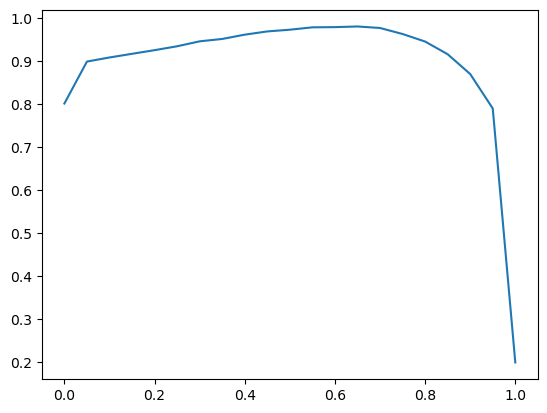

In [647]:
# plotting the threshold against the accuracy score
plt.plot(thresholds, scores)

In [648]:
from collections import Counter
Counter(y_pred >= 1.0)

Counter({np.False_: 1999})

In [649]:
1 - y_val.mean()

np.float64(0.19909954977488742)

### Confusion Matrix

In [650]:
# confusion matrix for actual positive and actual negative
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [651]:
# confusion matrix for predicted positive and predicted negative
t = 0.6
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [652]:
# True positive
tp = (predict_positive & actual_positive).sum()

# True negative
tn = (predict_negative & actual_negative).sum()

# False positive
fp = (predict_positive & actual_negative).sum()

# False negative
fn = (predict_negative & actual_positive).sum()

In [653]:
# confusion matrix
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[ 368,   30],
       [  13, 1588]])

In [654]:
# converting the confusion matrix to a % value
confusion_matrix_insight =  confusion_matrix / confusion_matrix.sum()

confusion_matrix_insight.round(2)

array([[0.18, 0.02],
       [0.01, 0.79]])

The values from the confusion table serve as the basis for many other evaluation metrics. For example, we can calculate accuracy by taking all the correct predictions—TN and TP together—and dividing that number by the total number of observations in all four cells of the table:

### Precision and Recall

In [655]:
p = tp / (tp + fp)
print(p)

0.9814585908529048


In [656]:
r = tp / (tp + fn)
print(r)

0.9918800749531543


While the **precison** measures the the correctness of positive predictions (profit predictions). Higher precision means fewer false positives.

**Recall**: Measures how many of the actual churners were correctly identified. Higher recall means fewer false negatives.

In imbalanced datasets, **accuracy** can be misleading, so precision and recall offer more insight into the model’s true performance.

### ROC Curves

In [657]:
# compute the true positive rate
tpr = tp / (tp + fn)
tpr

np.float64(0.9918800749531543)

In [658]:
# compute the false positive rate
fpr = fp / (fp + tn)
fpr

np.float64(0.07537688442211055)

Evaluating a model at different thresholds can help us understand how the model performs at different levels of sensitivity and specificity. The ROC curve is a useful tool for visualizing this trade-off.
The code  below shows how to compute the confusion matrix, precision, recall, and ROC curve for a classification model in Python.

In [659]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [660]:
scores

[(np.float64(0.0), np.int64(1601), np.int64(398), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(1601), np.int64(298), np.int64(0), np.int64(100)),
 (np.float64(0.02), np.int64(1601), np.int64(265), np.int64(0), np.int64(133)),
 (np.float64(0.03), np.int64(1601), np.int64(234), np.int64(0), np.int64(164)),
 (np.float64(0.04), np.int64(1601), np.int64(216), np.int64(0), np.int64(182)),
 (np.float64(0.05), np.int64(1601), np.int64(203), np.int64(0), np.int64(195)),
 (np.float64(0.06), np.int64(1601), np.int64(196), np.int64(0), np.int64(202)),
 (np.float64(0.07), np.int64(1601), np.int64(193), np.int64(0), np.int64(205)),
 (np.float64(0.08), np.int64(1601), np.int64(193), np.int64(0), np.int64(205)),
 (np.float64(0.09), np.int64(1601), np.int64(187), np.int64(0), np.int64(211)),
 (np.float64(0.1), np.int64(1601), np.int64(184), np.int64(0), np.int64(214)),
 (np.float64(0.11), np.int64(1601), np.int64(181), np.int64(0), np.int64(217)),
 (np.float64(0.12), np.int64(1601), np.int64

In [661]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,1601,398,0,0
1,0.01,1601,298,0,100
2,0.02,1601,265,0,133
3,0.03,1601,234,0,164
4,0.04,1601,216,0,182
...,...,...,...,...,...
96,0.96,1134,0,467,398
97,0.97,1075,0,526,398
98,0.98,980,0,621,398
99,0.99,737,0,864,398


In [662]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,1601,398,0,0,1.000000,1.000000
10,0.1,1601,184,0,214,1.000000,0.462312
20,0.2,1601,150,0,248,1.000000,0.376884
30,0.3,1601,109,0,289,1.000000,0.273869
40,0.4,1601,78,0,320,1.000000,0.195980
50,0.5,1600,54,1,344,0.999375,0.135678
60,0.6,1588,30,13,368,0.991880,0.075377
70,0.7,1564,10,37,388,0.976889,0.025126
80,0.8,1493,2,108,396,0.932542,0.005025
90,0.9,1341,1,260,397,0.837601,0.002513


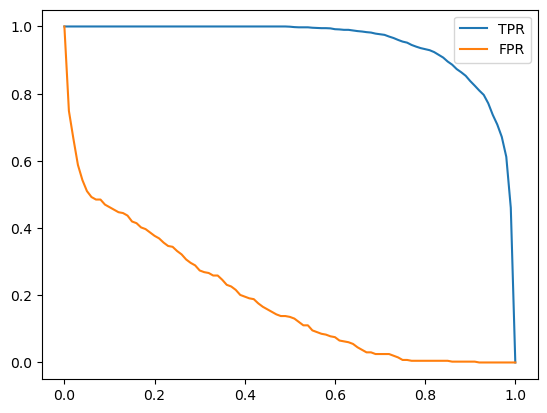

In [663]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random Model ROC Curve

In [664]:
# Generate a random array of values
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       1.84127556e-01, 8.28732852e-01, 3.09979598e-02])

In [665]:
# Compute the accuracy of the random model
((y_rand >= 0.6) == y_val).mean()

np.float64(0.4442221110555278)

In [666]:
# compute the confusion matrix for the random model
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores



In [667]:
# compute the confusion matrix for the random model
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,1601,398,0,0,1.000000,1.000000
1,0.01,1589,392,12,6,0.992505,0.984925
2,0.02,1563,388,38,10,0.976265,0.974874
3,0.03,1550,380,51,18,0.968145,0.954774
4,0.04,1536,374,65,24,0.959400,0.939698
...,...,...,...,...,...,...,...
96,0.96,68,14,1533,384,0.042473,0.035176
97,0.97,53,11,1548,387,0.033104,0.027638
98,0.98,32,8,1569,390,0.019988,0.020101
99,0.99,13,2,1588,396,0.008120,0.005025


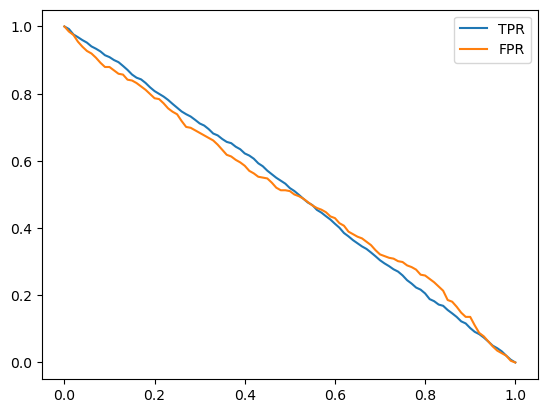

In [668]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### ideal Model

In [669]:
# number of positive and negative values in the validation set
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(398), np.int64(1601))

In [670]:
# ideal model
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [671]:
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 5.00500501e-04, 1.00100100e-03, ...,
       9.98998999e-01, 9.99499499e-01, 1.00000000e+00])

In [672]:
1 - y_val.mean()

np.float64(0.19909954977488742)

In [673]:
accuracy_score(y_ideal, y_ideal_pred >= 0.1990)

1.0

In [674]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,1601,398,0,0,1.000000,1.000000
10,0.1,1601,198,0,200,1.000000,0.497487
20,0.2,1599,0,2,398,0.998751,0.000000
30,0.3,1399,0,202,398,0.873829,0.000000
40,0.4,1199,0,402,398,0.748907,0.000000
50,0.5,1000,0,601,398,0.624610,0.000000
60,0.6,800,0,801,398,0.499688,0.000000
70,0.7,600,0,1001,398,0.374766,0.000000
80,0.8,400,0,1201,398,0.249844,0.000000
90,0.9,200,0,1401,398,0.124922,0.000000


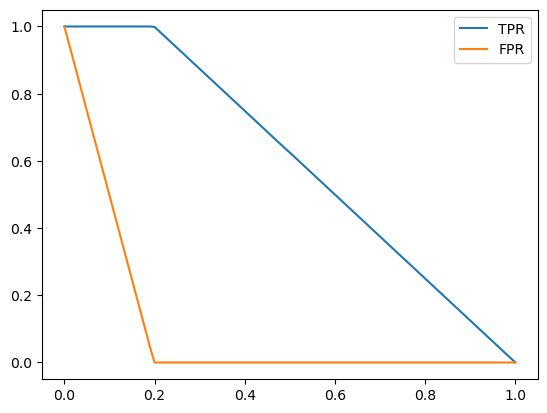

In [675]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

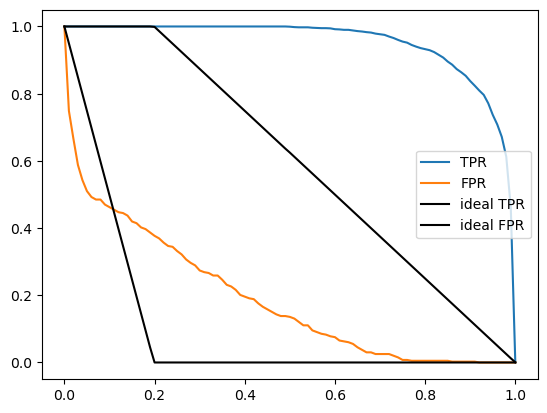

In [676]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
 
#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
 
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='ideal TPR', color = 'black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='ideal FPR', color = 'black')
 
plt.legend()

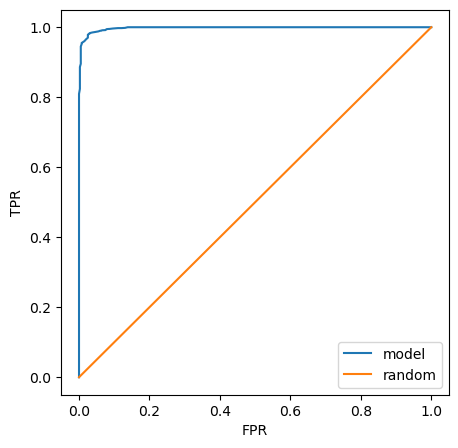

In [677]:
plt.figure(figsize=(5,5))
 
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1], [0,1], label='random')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

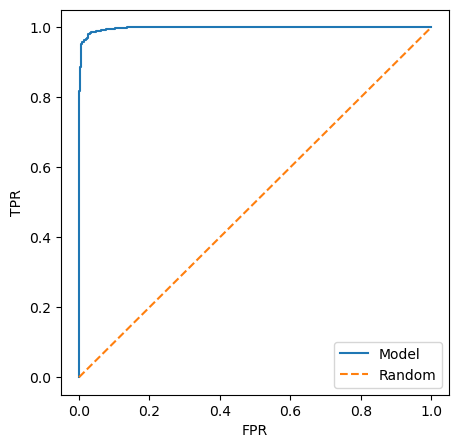

In [678]:
# We can also use the ROC functionality of scikit learn package
from sklearn.metrics import roc_curve
 
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
 
plt.figure(figsize=(5,5))
 
plt.plot(fpr, tpr, label='Model')
plt.plot([0,1], [0,1], label='Random', linestyle='--')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

### Area Under the Curve

In [679]:
from sklearn.metrics import auc

# calculating the area under the curve for all the models
print(auc(fpr, tpr))

print(auc(df_scores.fpr, df_scores.tpr))

print(auc(df_ideal.fpr, df_ideal.tpr))

0.9976349580507158
0.997621618398049
0.9999717513237643


In [680]:

# auc score using scikit learn
from sklearn.metrics import roc_auc_score
 
roc_auc_score(y_val, y_pred)


np.float64(0.9976349580507158)

### Cross Validation

In [681]:
def train(df_train, y_train):
    dicts = df_train[categorical_columns + numerical_columns].to_dict(orient='records')  # Prepare data for encoding
    
    dv = DictVectorizer(sparse=False)  # Encoder for one-hot encoding
    X_train = dv.fit_transform(dicts)  # Transform data

    model.fit(X_train, y_train)  # Train model on training data

    return dv, model  # Return encoder and model


In [682]:
dv, model = train(df_train, y_train)

In [683]:
def predict(df, dv, model):
     dicts = df[categorical_columns + numerical_columns].to_dict(orient='records')  # Prepare data for encoding
     X = dv.transform(dicts)  # Transform data using existing encoder
     y_pred = model.predict_proba(X)[:,1]  # Get prediction probabilities

     return y_pred

In [684]:
y_pred = predict(df_val, dv, model)
y_pred

array([0.92252964, 0.99847474, 0.99882856, ..., 0.9871268 , 0.02713281,
       0.98697476])

In [685]:
from sklearn.model_selection import KFold
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1) 
kfold.split(df_train_full)

<generator object _BaseKFold.split at 0x307401c40>

In [686]:
train_idx, val_idx = next(kfold.split(df_train_full))
len(train_idx), len(val_idx)

(7195, 800)

In [687]:
len(df_train_full)

7995

In [688]:
# We can use iloc to select a part of this dataframe
df_train = df_train_full.iloc[train_idx]
df_val = df_train_full.iloc[val_idx]

In [689]:
df_train.head()

,order_id,order_date,ship_date,customer,manufactory,segment,category,subcategory,region,city,...,discount,profit,quantity,sales,profit_margin,order_year,order_month,ship_year,ship_month,product_name_encoded
0,us-2023-167395,2022-12-02,2022-12-04,kunst_miller,ge,consumer,technology,phones,east,lowell,...,0.0,1,5,6.888521,0.2900,2022,12,2022,12,724
1,us-2023-140480,2022-07-08,2022-07-12,harold_engle,hunt,corporate,office_supplies,art,east,newark,...,0.0,1,5,5.170200,0.2600,2022,7,2022,7,885
2,us-2021-111395,2020-11-23,2020-11-27,victoria_brennan,tenex,corporate,office_supplies,storage,central,san_antonio,...,0.2,1,2,3.334203,0.0875,2020,11,2020,11,1544
3,us-2023-100622,2022-11-03,2022-11-07,dave_kipp,hunt,consumer,office_supplies,art,south,orlando,...,0.2,1,2,4.042771,0.0750,2022,11,2022,11,885
4,us-2021-159513,2020-04-02,2020-04-09,john_dryer,other,consumer,technology,machines,west,los_angeles,...,0.2,1,3,4.290131,0.3375,2020,4,2020,4,1608


In [692]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.profit.values
    y_val = df_val.profit.values

    dv, model = train(df_train, y_train)  # Train model
    y_pred = predict(df_val, dv, model)   # Get predictions

    auc = roc_auc_score(y_val, y_pred)    # Calculate AUC score for validation fold
    scores.append(auc)                    # Store the score

scores




[np.float64(0.9974619747823259),
 np.float64(0.996574358974359),
 np.float64(0.9985808571234168),
 np.float64(0.9966082124557986),
 np.float64(0.9971692923230808),
 np.float64(0.9968107585062896),
 np.float64(0.9953113884757163),
 np.float64(0.9986553155110691),
 np.float64(0.9970335535845388),
 np.float64(0.9983884759586924)]

In [696]:
from sklearn.model_selection import KFold
!pip3 install tqdm
from tqdm.auto import tqdm

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_train_full)):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.profit.values
    y_val = df_val.profit.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

scores


10it [00:02,  4.02it/s]


[np.float64(0.9974619747823259),
 np.float64(0.996574358974359),
 np.float64(0.9985808571234168),
 np.float64(0.9966082124557986),
 np.float64(0.9971692923230808),
 np.float64(0.9968107585062896),
 np.float64(0.9953113884757163),
 np.float64(0.9986553155110691),
 np.float64(0.9970335535845388),
 np.float64(0.9983884759586924)]

In [697]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.997 +- 0.001


### Finding the best parameters

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

kfold = KFold(n_splits=10, shuffle=True, random_state=1)  

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    scores = []
    
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.profit.values
        y_val = df_val.profit.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f ± %.3f' % (C, np.mean(scores), np.std(scores)))


In [702]:
# Code for Cross-Validation with Different C Values:

from tqdm.auto import tqdm

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)  
    
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.profit.values
        y_val = df_val.profit.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f ± %.3f' % (C, np.mean(scores), np.std(scores)))


 14%|█▍        | 1/7 [00:18<01:49, 18.32s/it]

C=0.001 0.966 ± 0.003


 29%|██▊       | 2/7 [01:43<04:47, 57.42s/it]

C=0.01 0.990 ± 0.001


 43%|████▎     | 3/7 [03:13<04:49, 72.41s/it]

C=0.1 0.997 ± 0.000


 57%|█████▋    | 4/7 [04:46<04:01, 80.48s/it]

C=0.5 0.999 ± 0.000


 71%|███████▏  | 5/7 [06:10<02:43, 81.97s/it]

C=1 0.999 ± 0.000


 86%|████████▌ | 6/7 [07:32<01:21, 81.85s/it]

C=5 0.999 ± 0.000


100%|██████████| 7/7 [08:57<00:00, 76.83s/it]

C=10 0.999 ± 0.000
